In [1]:
#import libraries
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Gathering data

### Twitter archive

In [3]:
#Read twitter-archive-enhanced dataset from csv
archive = pd.read_csv('Data Analyst_project 3\\twitter-archive-enhanced.csv')

### Image predictions

In [4]:
#Storing image-predictions dataset in response variable
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [5]:
#Writing the dataset to local file in image-predictions folder
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
#Read image-predictions dataset from tsv
predictions = pd.read_csv('Data Analyst_project 3\\image-predictions.tsv',sep = '\t')

### Twitter API

In [9]:
#Reading json file
json_list = []
with open('Data Analyst_project 3\\tweet-json.txt') as json_file:
    for json_obj in json_file:
        json_dict = json.loads(json_obj)
        json_list.append(json_dict)

In [10]:
#Creating dataframe with tweet_id, retweet-count and favorite-count columns
count = pd.DataFrame(json_list, columns =['id_str', 'retweet_count', 'favorite_count'])

# Assess data

In [11]:
#Find rows containing retweets
archive[archive['retweeted_status_id'].notnull()].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None


In [12]:
#Find rows containing responses
archive[archive['in_reply_to_status_id'].notnull()].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None


In [13]:
#Look at type of timestamp column
archive.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [14]:
#Check if there are any duplicated urls
archive.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

In [15]:
#Check if rating-numerator column contain only relevant values
archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [16]:
#Check if rating-denominator column contain only relevant values
archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [17]:
#Check for False in column p1_dog
predictions.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [18]:
#Look at breed of dogs
predictions.query('p1_dog == True')['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'malamute', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'West_Highland_white_terrier', 'toy_poodle',
       'giant_schnauzer', 'vizsla', 'Rottweiler', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier

##### Quality
###### archive dataset

- Some tweets in the archive dataset are actually retweets
- Some tweets are replies to other tweets
- column timestamp type is object
- duplicated URL in expanded_urls column
- columns doggo, floofer, pupper, puppo contain string *None* instead of NaN
- rating_numerator column coltains wrong values indices here([ 339,  403,  528,  700,  770,  904,  985, 1011, 1036, 1056, 1129, 1210, 1399, 1474, 1540, 1602, 1821, 4780]
- missing values in extended_urls column 
- *tweet_id* column as integer not string




###### predictions dataset

- an algorithm recognises something else instead of breed of dog
- column 'p1' some breeds start with upper letter while others start with lower letter, *_* split the words in breed
- *tweet_id* column as integer not string

###### count dataset
- column *tweet_id* is named str_id



##### Tidyness
###### archive dataset

- one variable in 4 columns (doggo, floofer, pupper, puppo)
- all 3 data sets should be combined in one
- remove unnecessary columns (*in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_user_id*, *retweeted_status_timestamp* will not be useful for my analysis)
- two columns for one value *rating*: Rating numerator and rating denominator

# Clean

In [73]:
#Create copies of original datasets
archive_clean = archive.copy()
predictions_clean = predictions.copy()
count_clean = count.copy()

###### Some tweets in the archive dataset are actually retweets

###### Define
Drop rows with non null values in retweeted_status_id

###### Code

In [74]:
#Filter archive_clean data set where values in column 'retweet_status_id' equal to null
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

###### Test

In [75]:
#count null values in column 'retweeted_status_id'
archive_clean.retweeted_status_id.count()

0

###### Some tweets are replies to other tweets

###### Define
Drop rows with non null values in in_reply_to_status_id

###### Code

In [76]:
#Filter archive_clean data set where values in column 'in_reply_to_status_id' equal to null
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()]

###### Test

In [77]:
#count null values in column 'in_reply_to_status_id'
archive_clean.in_reply_to_status_id.count()

0

##### remove unnecessary columns (*in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp* will not be useful for my analysis)

###### Define
Drop following columns from archive_clean:  
'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

###### Code

In [78]:
#Drop columns
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source'], axis = 1)

###### Test

In [79]:
#Display the first row
archive_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


##### one variable in 4 columns (doggo, floofer, pupper, puppo)

###### Define
Melt the *doggo*, *floofer*, *pupper* and *puppo* columns to a *stage* column. Since we have *None* strings in all columns, I will replace non-duplicate values with *missing* string by finding indecies with non-duplicate missing values and then iterate through the indecies to make replacements.

###### Code

In [80]:
#Create list of indecies of non-duplicated missing values
missing_values = archive_clean.query('doggo != "doggo" & floofer != "floofer" & pupper != "pupper" & puppo != "puppo"').index

In [81]:
#iterate through indecies and replace values in column 'doggo' with 'missing'
for i in missing_values:
    archive_clean.loc[i,'doggo'] = 'missing'

In [82]:
#display column names
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [83]:
#Reshape the last 4 columns to one column
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id', 'timestamp', 'text', 'expanded_urls',
                                                   'rating_numerator', 'rating_denominator', 'name'], var_name='stage_name', value_name = 'stage')

In [84]:
#Remove duplicated rows
archive_clean = archive_clean.query('stage != "None"')
archive_clean.drop(['stage_name'], axis = 1, inplace = True)

###### Test

In [85]:
archive_clean.stage.value_counts()

missing    1761
pupper      230
doggo        83
puppo        24
floofer      10
Name: stage, dtype: int64

##### column timestamp type is object

###### Define
Convert *timestamp* column to datetime format

###### Code

In [86]:
#Convert timestamp column to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

###### Test

In [87]:
#Display type of columns
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 7158
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   int64              
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   text                2108 non-null   object             
 3   expanded_urls       2105 non-null   object             
 4   rating_numerator    2108 non-null   int64              
 5   rating_denominator  2108 non-null   int64              
 6   name                2108 non-null   object             
 7   stage               2108 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.2+ KB


###### duplicated URL in *expanded_urls* column

###### Define
Split duplicated URLs by ',' and keep the first occurence

###### Code

In [88]:
#split duplicated URLs
archive_clean['expanded_urls'] = archive_clean['expanded_urls'].str.split(',', expand = True,)[0]

###### Test

In [89]:
#Display max width of column
pd.set_option('display.max_colwidth', None)
#Check if URL under index 4 is duplicated
archive_clean.expanded_urls[4]

'https://twitter.com/dog_rates/status/891327558926688256/photo/1'

###### column with doggo, floofer, pupper, puppo contain string *None* instead of NaN

###### Define  
Replace string *missing* with *NaN* in *stage* column

###### Code

In [90]:
#Replace missing with NaN
archive_clean['stage'] = archive_clean.stage.replace({'missing' : np.nan})

###### Test

In [91]:
#Lookup for NaN values in column 'stage'
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 7158
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   int64              
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   text                2108 non-null   object             
 3   expanded_urls       2105 non-null   object             
 4   rating_numerator    2108 non-null   int64              
 5   rating_denominator  2108 non-null   int64              
 6   name                2108 non-null   object             
 7   stage               347 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 212.8+ KB


###### rating_numerator column coltains large numbers (666)

###### Define
I could not find progrommatical solution to correct rating numerators, so I will do it manually one by one  
First, i display numerators that are greater than 15
Then I look at each each row and replace them with appropriate value

###### Code

In [92]:
#Display numerators greater than 15
archive_clean.query('rating_numerator > 15')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage
339,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,https://twitter.com/dog_rates/status/820690176645140481/photo/1,84,70,None,NaN
403,810984652412424192,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,https://www.gofundme.com/sams-smile,24,7,Sam,NaN
528,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN
700,758467244762497024,2016-07-28 01:00:57+00:00,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,NaN
770,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,NaN
904,731156023742988288,2016-05-13 16:15:54+00:00,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,NaN
985,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN
1011,713900603437621249,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,NaN
1036,710658690886586372,2016-03-18 02:46:49+00:00,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,NaN
1056,709198395643068416,2016-03-14 02:04:08+00:00,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,NaN


In [93]:
#Display indices of row where numerators are greater than 15
archive_clean.query('rating_numerator > 15').index

Int64Index([ 339,  403,  528,  700,  770,  904,  985, 1011, 1036, 1056, 1129,
            1210, 1399, 1474, 1540, 1602, 1821, 4780],
           dtype='int64')

row 403 should be removed because it has no rating  
row 770 should be removed because it the rating is not real  
row 1821 should be removed because Snoop Dogg is on the picture

In [94]:
#Drop rows no 403, 770, 1821
archive_clean.drop([403 , 770, 1821], axis = 0, inplace=True)

In [95]:
#Replace with correct values
archive_clean.loc[320, 'rating_numerator'] = 13
archive_clean.loc[339, 'rating_numerator'] = 12
archive_clean.loc[528, 'rating_numerator'] = 10
archive_clean.loc[700, 'rating_numerator'] = 11
archive_clean.loc[904, 'rating_numerator'] = 11
archive_clean.loc[985, 'rating_numerator'] = 11
archive_clean.loc[1011, 'rating_numerator'] = 11
archive_clean.loc[1036, 'rating_numerator'] = 10
archive_clean.loc[1056, 'rating_numerator'] = 9
archive_clean.loc[1129, 'rating_numerator'] = 12
archive_clean.loc[1210, 'rating_numerator'] = 11
archive_clean.loc[1399, 'rating_numerator'] = 11
archive_clean.loc[1474, 'rating_numerator'] = 11
archive_clean.loc[1540, 'rating_numerator'] = 12
archive_clean.loc[1602, 'rating_numerator'] = 11
archive_clean.loc[4780, 'rating_numerator'] = 11

###### Test

In [96]:
#No rows where numerators are greater than 15
assert archive_clean.query('rating_numerator > 15').shape[0] == 0

###### Missing values in extended_urls column

###### Define  
Remove rows with missing URL in extended_urls column

###### Code

In [97]:
#Drop rows with null values in 'extended_urls' column
archive_clean = archive_clean[archive_clean['expanded_urls'].notnull()]

###### Test

In [98]:
#No rows where numerators are greater than 15
assert archive_clean[archive_clean['expanded_urls'].isnull()].shape[0] == 0

In [99]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 7158
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2102 non-null   int64              
 1   timestamp           2102 non-null   datetime64[ns, UTC]
 2   text                2102 non-null   object             
 3   expanded_urls       2102 non-null   object             
 4   rating_numerator    2102 non-null   int64              
 5   rating_denominator  2102 non-null   int64              
 6   name                2102 non-null   object             
 7   stage               346 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 147.8+ KB


###### *tweet_id* column as integer not string

###### Define
Convert 'tweet_id' column from int to str

###### Code

In [100]:
#Convert 'tweet_id' column from int to str
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

In [101]:
#Check if 'tweet_id' column is str
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 7158
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2102 non-null   object             
 1   timestamp           2102 non-null   datetime64[ns, UTC]
 2   text                2102 non-null   object             
 3   expanded_urls       2102 non-null   object             
 4   rating_numerator    2102 non-null   int64              
 5   rating_denominator  2102 non-null   int64              
 6   name                2102 non-null   object             
 7   stage               346 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 147.8+ KB


###### two columns for one value *rating*: Rating numerator and rating denominator

###### Define
Assume that rating denominator should be always 10, so the actual rating should be rating numerator divided by 10. I add new c alculated column and drop columns *rating_numerator* and *rating_denominator*

###### Code

In [102]:
#Add new column where rating numerator is devided by 10
archive_clean['rating'] = archive_clean['rating_numerator'] / 10

In [103]:
#Drop 2 columns
archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

###### Test

In [104]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 7158
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2102 non-null   object             
 1   timestamp      2102 non-null   datetime64[ns, UTC]
 2   text           2102 non-null   object             
 3   expanded_urls  2102 non-null   object             
 4   name           2102 non-null   object             
 5   stage          346 non-null    object             
 6   rating         2102 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 131.4+ KB


###### Algorithm recognises something else instead of breed of dog

###### Define
Remove lines where the algorithm did not recognise the breed of dog by filtering out the rows with no True value in p_dog column  
Create new column which will store breeds of dogs.

###### Code

In [105]:
#filtering out rows where breed of dog was not recognised
predictions_clean = predictions_clean.query('p1_dog == True | p2_dog == True | p3_dog == True')
#Display first five rows
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


From https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

In [106]:
# create a list of our conditions
conditions = [
    (predictions_clean['p1_dog'] == True),
    (predictions_clean['p1_dog'] == False) & (predictions_clean['p2_dog'] == True),
    (predictions_clean['p1_dog'] == False) & (predictions_clean['p2_dog'] == False) & (predictions_clean['p3_dog'] == True),
    ]

# create a list of the values we want to assign for each condition
values = [predictions_clean['p1'], predictions_clean['p2'], predictions_clean['p3']]

# create a new column and use np.select to assign values to it using our lists as arguments
predictions_clean['breed'] = np.select(conditions, values)


###### Test

In [107]:
# display updated DataFrame
predictions_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,golden_retriever


In [108]:
#Remove unnecessary columns
predictions_clean = predictions_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)
predictions_clean.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


###### column 'breed' some breeds start with upper letter while others start with lower letter, _ split the words in breed

###### Define
Capitalize all first words in column *breed*. Remove *_* between words

###### Code

In [109]:
#Capitalize all first words in column breed
predictions_clean['breed'] = predictions_clean['breed'].str.capitalize()
#Remove _ between words
predictions_clean['breed'] = predictions_clean['breed'].str.replace('_', ' ')

###### Test

In [110]:
#Display first five rows
predictions_clean.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature pinscher


###### *tweet_id* column as integer not string

###### Define
Convert 'tweet_id' column from int to str

###### Code

In [111]:
#Convert 'tweet_id' column from int to str
predictions_clean['tweet_id'] = predictions_clean['tweet_id'].astype(str)

###### Test

In [112]:
#Check if 'tweet_id' column is str
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1751 non-null   object
 1   jpg_url   1751 non-null   object
 2   breed     1751 non-null   object
dtypes: object(3)
memory usage: 54.7+ KB


###### column *tweet_id* is named str_id in count dataset

###### Define
Change name from str_id to tweet_id in count dataset

###### Code

In [113]:
#Rename id_str column to tweet_id
count_clean.rename({'id_str': 'tweet_id'}, axis=1, inplace=True)

###### Test

In [114]:
count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


###### all 3 data sets should be combined in one

###### Define
Merge all three datasets into one master dataset based on tweet_id

###### Code

In [115]:
#Merge all three datasets into one master dataset based on tweet_id
master = pd.merge(archive_clean, predictions_clean, how="left", on=["tweet_id"])
master = pd.merge(master, count_clean, how="left", on=["tweet_id"])
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 2101
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2102 non-null   object             
 1   timestamp       2102 non-null   datetime64[ns, UTC]
 2   text            2102 non-null   object             
 3   expanded_urls   2102 non-null   object             
 4   name            2102 non-null   object             
 5   stage           346 non-null    object             
 6   rating          2102 non-null   float64            
 7   jpg_url         1674 non-null   object             
 8   breed           1674 non-null   object             
 9   retweet_count   2102 non-null   int64              
 10  favorite_count  2102 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(7)
memory usage: 197.1+ KB


In [116]:
master.head(8)

,tweet_id,timestamp,text,expanded_urls,name,stage,rating,jpg_url,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,1.3,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,9774,41048
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,NaN,1.3,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake bay retriever,3261,20562
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://gofundme.com/ydvmve-surgery-for-jax,Jax,NaN,1.3,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,2158,12041
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,None,NaN,1.3,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,16716,56848


In [257]:
master.to_csv('C:\\Users\\averi\\OneDrive\\Рабочий стол\\Data_Analyst\\Data Analyst_project 3\\deliverables\\twitter_archive_master.csv', index = False)

#### Explanatory analysis

###### What are the relative frequencies in dog stages

In [184]:
#Set up styles for the graphs globally
sb.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=13)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('font', size=12)  

In [208]:
#Align plots to center
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

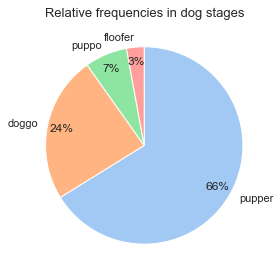

In [209]:
#Creation of pie chart
plt.figure(figsize=(12, 4), tight_layout=True)
sorted_counts = master['stage'].value_counts().rename_axis('unique_values').reset_index(name='counts')
plt.pie(sorted_counts['counts'], labels = sorted_counts['unique_values'], startangle = 90, counterclock = False, 
        colors = sb.color_palette('pastel'), autopct = '%1.0f%%', pctdistance =0.85)
plt.title('Relative frequencies in dog stages');

In [210]:
#Create dataframe with breed and favorite-count columns
insight2 = master.filter(['breed', 'favorite_count'], axis=1)
#Drop NaN values
insight2.dropna(inplace = True)
#Check quantity of Null values
insight2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 1 to 2101
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   breed           1674 non-null   object
 1   favorite_count  1674 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.2+ KB


In [211]:
#Groupping by breed and calc average favourite count by breed
insight2 = insight2.groupby(['breed'])['favorite_count'].mean().reset_index()

In [212]:
#Sorting the resulting dataset
insight2.sort_values(by='favorite_count', ascending=False, inplace = True)

In [213]:
#Cut the dataset
insight2 = insight2.head(10)

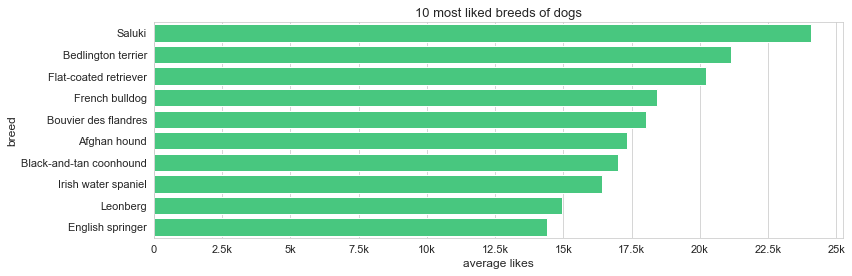

In [231]:
#Plot a barchart
plt.figure(figsize=(12, 4), tight_layout=True)
sb.barplot(data = insight2, x = 'favorite_count', y = 'breed', color = '#33DC7C')
xticks = [0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000]
xlabels = [0, '2.5k', '5k', '7.5k', '10k', '12.5k', '15k', '17.5k', '20k', '22.5k', '25k']
plt.title('10 most liked breeds of dogs');
plt.xlabel('average likes');
plt.ylabel('breed')
plt.xticks(xticks, xlabels);

In [226]:
#Create dataframe with breed and rating columns
insight3 = master.filter(['breed', 'rating'], axis=1)
#Drop NaN values
insight3.dropna(inplace = True)
#Check quantity of Null values
insight3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 1 to 2101
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   breed   1674 non-null   object 
 1   rating  1674 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.2+ KB


In [227]:
#Groupping by breed and calc average favourite count by breed
insight3 = insight3.groupby(['breed'])['rating'].mean().reset_index()

In [228]:
#Sort the resulting dataset
insight3.sort_values(by='rating', ascending=False, inplace = True)

In [229]:
#Cut the dataset
insight3 = insight3.head(10)


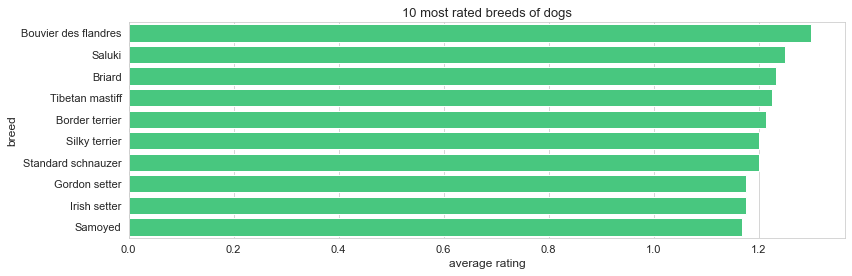

In [232]:
#plot a barchart
plt.figure(figsize=(12, 4), tight_layout=True)
sb.barplot(data = insight3, x = 'rating', y = 'breed', color = '#33DC7C')
plt.title('10 most rated breeds of dogs');
plt.xlabel('average rating');
plt.ylabel('breed');

The following sources were used to find solution  
- stackoverflow.com
- https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition